# **Plotting Skin Friction *'C<sub>f</sub>'* with Various '*nut*' Tolerances**

This notebook explains how to plot skin friction *C<sub>f</sub>* along with x-direction for various '*nut*' tolerances. The related tolerance is mentioned in '*nut*' dictionary for '*kOmegaSST*' model as follows.
```
    bottomWall
    {
        type            nutUSpaldingWallFunction;
        tolerance       1e-5;
        value           $internalField;
    }
```
In order to investigate an emergence of the kink at the front plate, the simulation for '*kOmegaSST*' model is executed. The default value of tolerance is *0.01*. In this simulation, the tolerances of *1e-5*, *1e-6*, *1e-7*, and *1e-8* will be set.

First of all, related setups are to be established as follows.

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

## **1. Set Related Variables in Accordance with the Case Data**

In order to simulate the case for various conditions, we need to set related variables (e.g. farfield velocity, kinematic viscosity, model name, yplus, and residual limits). Particularly, *'yp'* and *'res_list'* should be lists, and therefore we can delineate all the related graph in one jupyter notebook. The list *'res_list'* contains all the different limit residuals for **SIMPLE** residual control. However, only the residual of *1e-5* will be plotted at a later section.

In [2]:
UInf = 69.4
nuInf = 1.388e-05
model = "kOmegaSST"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-3', '1e-4', '1e-5', '1e-6']

## **2. Load Data**
\*.*csv* files that were created during a simulation are loaded to python. For this case, we need to calculate with various residual limits and yp values, and hence *'tauw_path'* should be a list that contains each residual limit value for each yp. In addition, *'.head()'* is used for checking top 5 rows and all columns are well divided. For each '*nut*' tolerance, separate lists are to be used.

In [3]:
tauw_path = [run + 'turbulentFlatPlate_tol1e-5/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data = [pd.read_csv(tauw_path[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]

tauw_path2 = [run + 'turbulentFlatPlate_tol1e-6/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data2 = [pd.read_csv(tauw_path2[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]

tauw_path3 = [run + 'turbulentFlatPlate_tol1e-7/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data3 = [pd.read_csv(tauw_path3[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]

tauw_path4 = [run + 'turbulentFlatPlate_tol1e-8/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data4 = [pd.read_csv(tauw_path4[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data4[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.7771,-0.967471,0
1,0.001458,-19.8736,-0.005168,0
2,0.002433,-14.5154,-0.001112,0
3,0.003410,-12.3243,-0.000506,0
4,0.004390,-11.0845,-0.000302,0


## **3. Calculation of *'Re<sub>x</sub>'* and *'C<sub>f</sub>'***

*'Re<sub>x</sub>'* should be calculated for x-axis, and *'C<sub>f</sub>'* is to be found for y-axis. This simulation case is incompressible, and thus only the kinematic viscosity is used. *'Re<sub>x</sub>'* needs not to be a list since the coordinates of the cell centers are the same, whereras *'C<sub>f</sub>'* is a list.

In [4]:
x0 = 0
Rex = (tauw_data[0]['ccx'] - x0)*UInf/nuInf
Cf = [np.sqrt(tauw_data[i + len(res_list)*j]['tau_xx']**2 + tauw_data[i + len(res_list)*j]['tau_yy']**2 + tauw_data[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

Rex2 = (tauw_data2[0]['ccx'] - x0)*UInf/nuInf
Cf2 = [np.sqrt(tauw_data2[i + len(res_list)*j]['tau_xx']**2 + tauw_data2[i + len(res_list)*j]['tau_yy']**2 + tauw_data2[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

Rex3 = (tauw_data3[0]['ccx'] - x0)*UInf/nuInf
Cf3 = [np.sqrt(tauw_data3[i + len(res_list)*j]['tau_xx']**2 + tauw_data3[i + len(res_list)*j]['tau_yy']**2 + tauw_data3[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

Rex4 = (tauw_data4[0]['ccx'] - x0)*UInf/nuInf
Cf4 = [np.sqrt(tauw_data4[i + len(res_list)*j]['tau_xx']**2 + tauw_data4[i + len(res_list)*j]['tau_yy']**2 + tauw_data4[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

## **4. Wieghardt's Equation**

*Wieghardt's equation* is to be calculated in order to be compared to simulation.

In [5]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

## **5. Plot**

Skin friction *'C<sub>f</sub>'* is plotted along with *'Re<sub>x</sub>'*.

The result is totally the same regardless of the tolerance of calculating '*nut*'.

According to the below link, the reason might be mentioned.

https://www.openfoam.com/documentation/guides/latest/doc/guide-bcs-wall-turbulence-nutUSpaldingWallFunction.html

We can override the tolerance, but it affects only if the current '*nut*' does not satisfy the turbulence conditions. The result would imply that the '*nut*' condition already satisfies for all the tolerance, and thus the kink does not disappear in '*kOmegaSST*' model in spite of the various tolerances. The residual investigation is not executed because the behavior of the skin friction is totally identical.

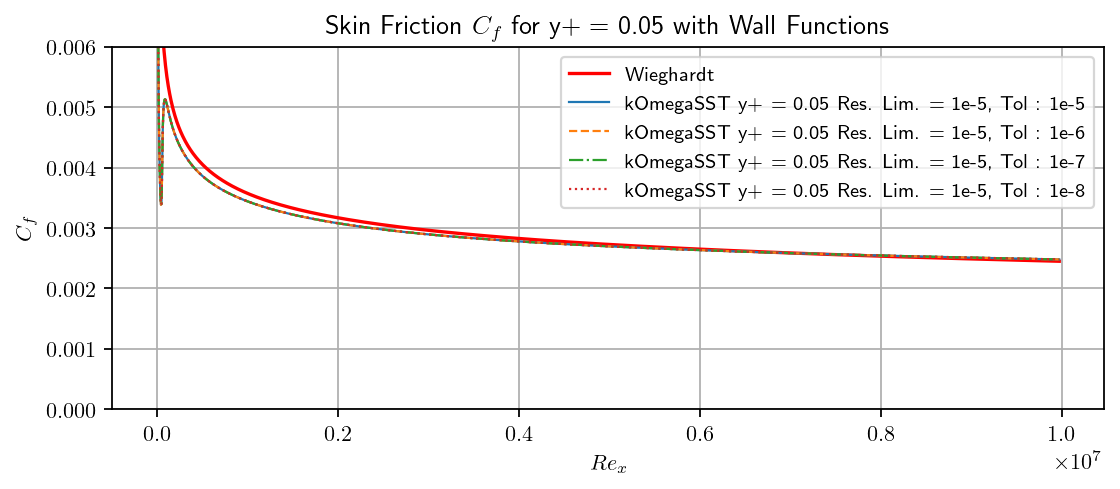

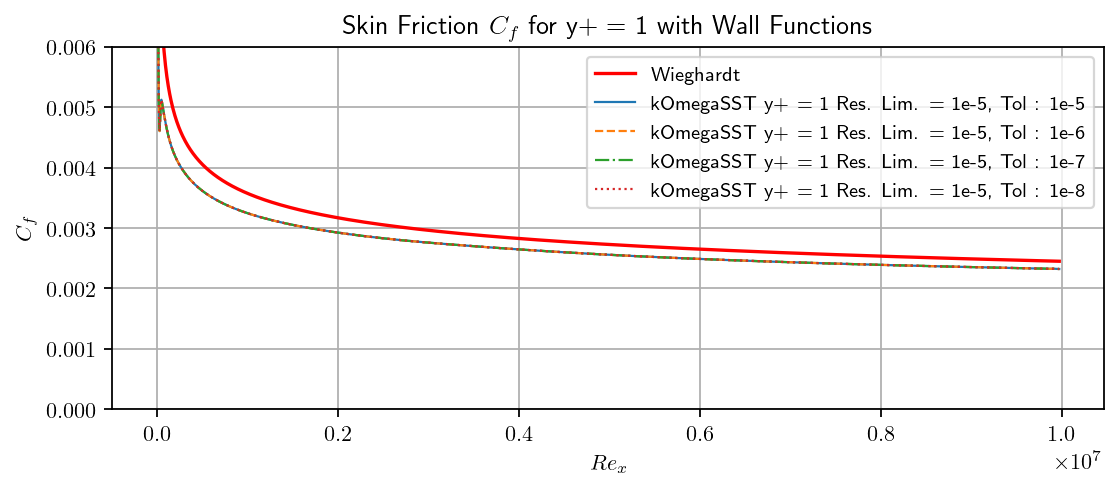

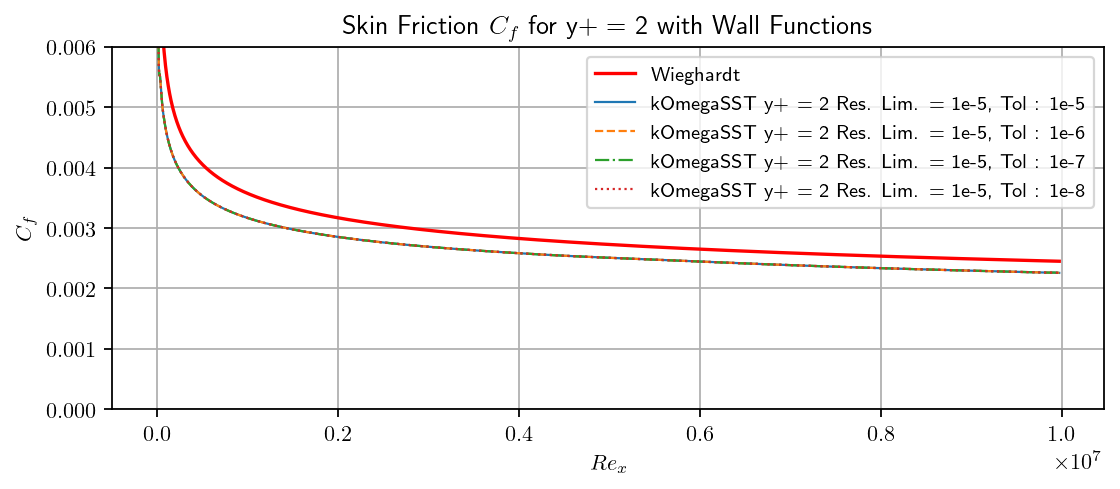

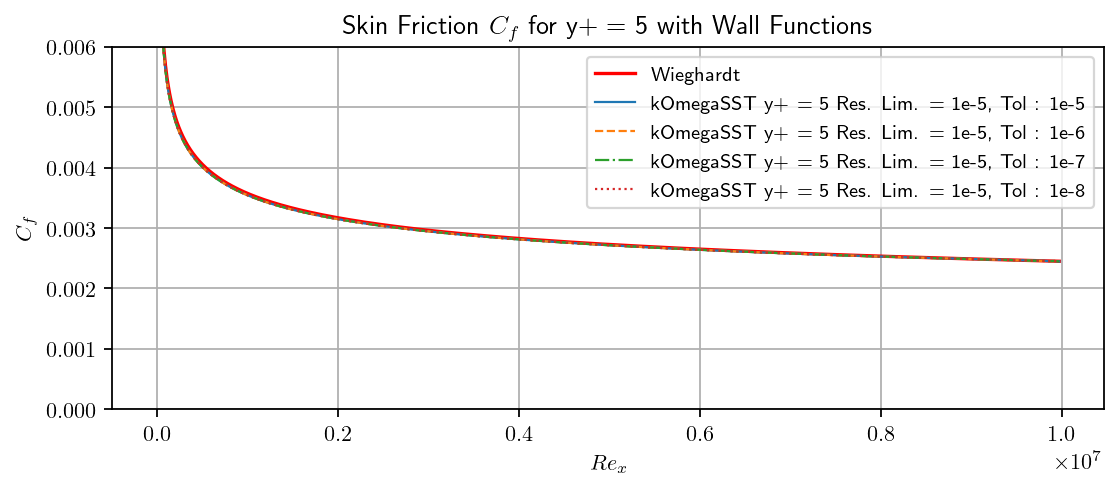

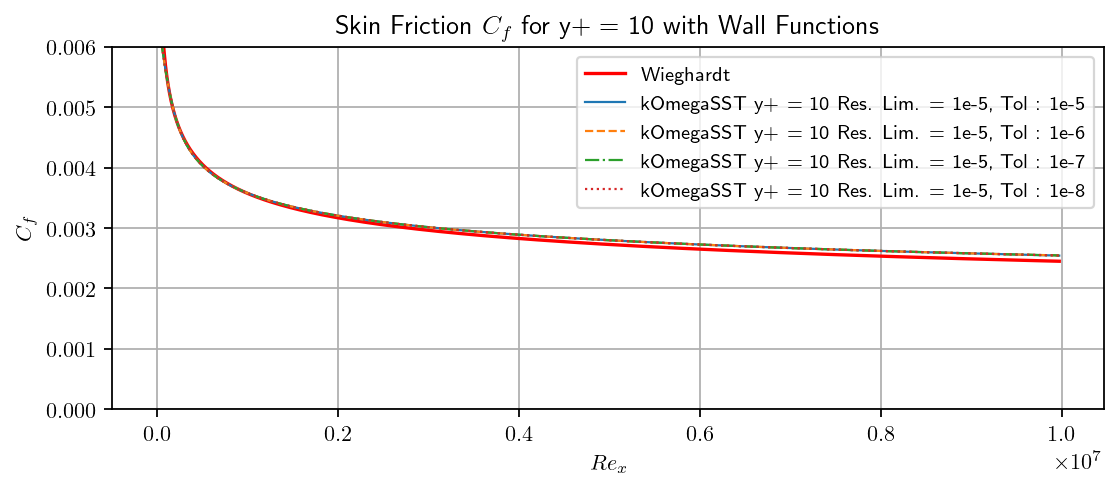

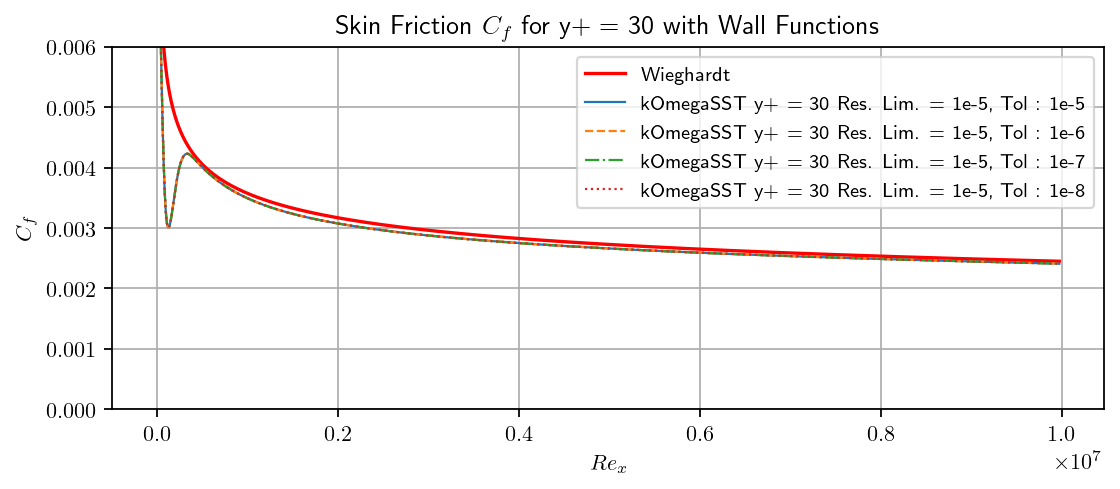

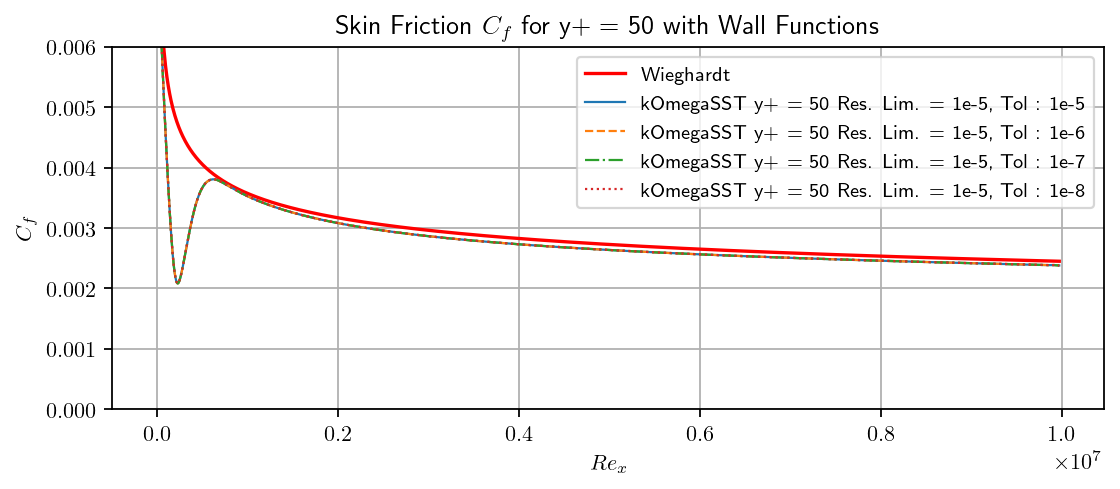

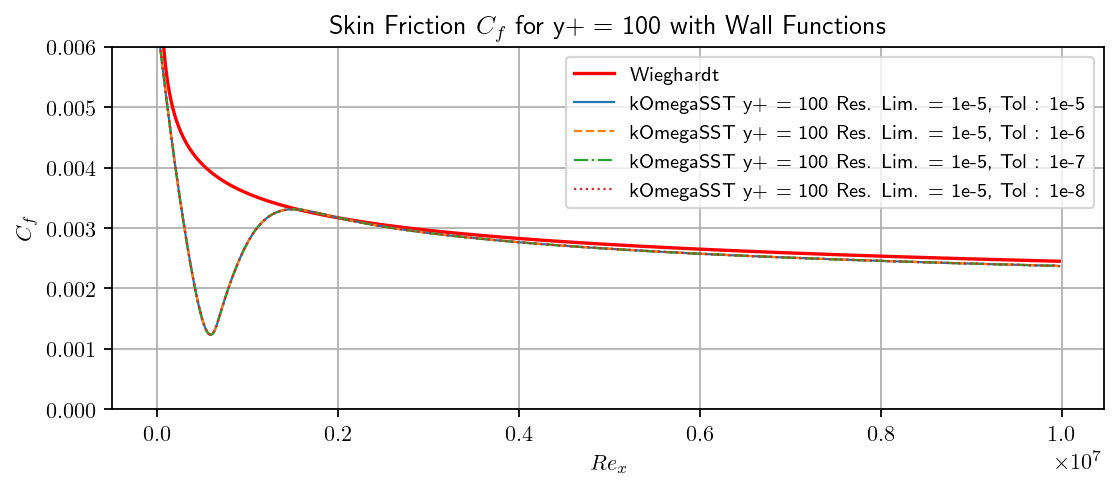

In [6]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {} with Wall Functions".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    ax.plot(Rex, Cf[2 + len(res_list)*j], label = "{} y+ = {} Res. Lim. = 1e-5, Tol : 1e-5".format(model, yp[j]), ls = style[0], c = "C{:d}".format(0), lw = lw)
    ax.plot(Rex2, Cf2[2 + len(res_list)*j], label = "{} y+ = {} Res. Lim. = 1e-5, Tol : 1e-6".format(model, yp[j]), ls = style[1], c = "C{:d}".format(1), lw = lw)
    ax.plot(Rex3, Cf3[2 + len(res_list)*j], label = "{} y+ = {} Res. Lim. = 1e-5, Tol : 1e-7".format(model, yp[j]), ls = style[2], c = "C{:d}".format(2), lw = lw)
    ax.plot(Rex4, Cf4[2 + len(res_list)*j], label = "{} y+ = {} Res. Lim. = 1e-5, Tol : 1e-8".format(model, yp[j]), ls = style[3], c = "C{:d}".format(3), lw = lw)
    ax.legend(fontsize = 9)    